In [12]:
import yfinance as yf
import datetime as dt

In [19]:
start = dt.datetime(2013,1,1)
end = dt.datetime(2024,12,31)

In [20]:
dataset = yf.download('HDFCBANK.NS', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [24]:
dataset.columns = dataset.columns.droplevel(1)

In [34]:
dataset

Price,Close,High,Low,Open,Volume
Date,,,,,
2013-01-01,311.339783,311.612677,309.133807,310.248149,2014606
2013-01-02,312.636078,313.841422,310.680260,313.795949,4854798
2013-01-03,310.816742,313.841457,309.474978,313.841457,4571366
2013-01-04,308.997375,311.567248,306.018161,311.567248,5442254
2013-01-07,303.925873,310.975934,302.925213,310.975934,5502284
...,...,...,...,...,...
2024-12-23,1801.000000,1806.000000,1781.300049,1782.000000,5522296
2024-12-24,1798.099976,1808.699951,1789.550049,1802.050049,7242917
2024-12-26,1790.750000,1812.000000,1780.750000,1798.550049,5240839


In [29]:
from datetime import date, timedelta
import pandas as pd

In [85]:
start_date = pd.to_datetime("2013-01-01")
end_date = pd.to_datetime("2024-02-04") - timedelta(days=1094)

In [86]:
end_date

Timestamp('2021-02-05 00:00:00')

In [87]:
all_date = pd.date_range(start_date, end_date, freq='d')

In [88]:
dummyDate=dataset

In [89]:
dummyDate.index=all_date

In [90]:
dummyDate

Price,Close,High,Low,Open,Volume
2013-01-01,311.339783,311.612677,309.133807,310.248149,2014606
2013-01-02,312.636078,313.841422,310.680260,313.795949,4854798
2013-01-03,310.816742,313.841457,309.474978,313.841457,4571366
2013-01-04,308.997375,311.567248,306.018161,311.567248,5442254
2013-01-05,303.925873,310.975934,302.925213,310.975934,5502284
...,...,...,...,...,...
2021-02-01,1801.000000,1806.000000,1781.300049,1782.000000,5522296
2021-02-02,1798.099976,1808.699951,1789.550049,1802.050049,7242917
2021-02-03,1790.750000,1812.000000,1780.750000,1798.550049,5240839
2021-02-04,1798.250000,1805.949951,1789.099976,1794.800049,3629665


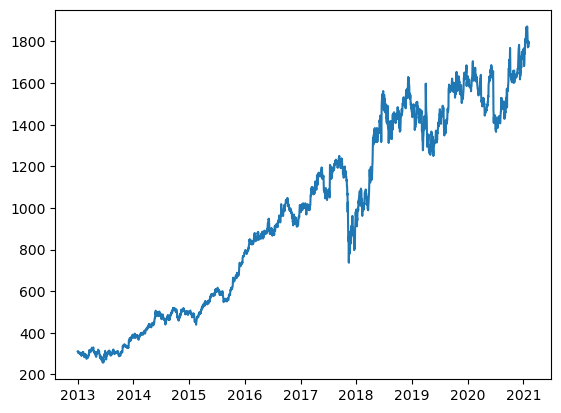

In [92]:
import matplotlib.pyplot as plt
plt.plot(dataset["Close"])

In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [94]:
result = seasonal_decompose(dummyDate['Close'], model='multicaptive')

<Figure size 1600x500 with 0 Axes>

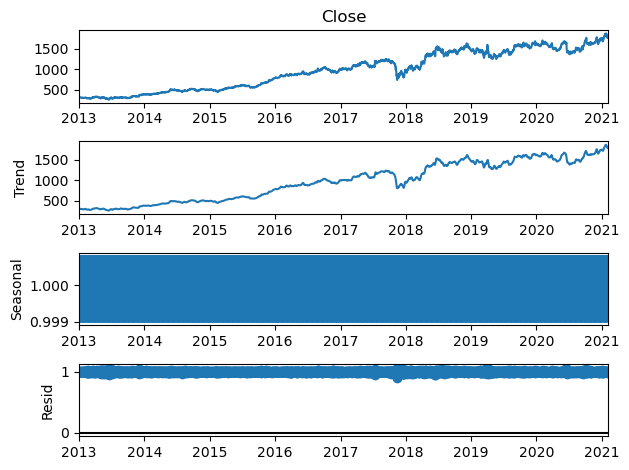

In [97]:
plt.figure(figsize=(16,5))
result.plot()
plt.show()

In [98]:
from statsmodels.tsa.stattools import adfuller

In [107]:
def adf_test(timeseries,df,pollutant):
    plt.figure(figsize=(16,5))
    
    from statsmodels.tsa.stattools import adfuller
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries,autolag="AIC")
    print("******************")
    print(dftest)
    print("******************")
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print(dfoutput)
    print("******************")

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    print("******************")

    ans=dfoutput
    print("Condition:")
    print("p-value<=0.05-->Accept Alternate Hypothesis")
    print("p-value>0.05-->Accept Null Hypothesis")
    if(ans['Test Statistic']<ans["Critical Value (1%)"] or ans['Test Statistic']<ans["Critical Value (5%)"] or ans['Test Statistic']<ans["Critical Value (10%)"] and ans["p-value"]<0.05):
        print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
        print("Reject null hypothesis:Non Stationarity")
        print("Accept Alternate hypothesis:Staionarity ")
        message="Stationarity based on ADH"
    else:
        print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
        print("Accept null hypothesis:Non Stationarity" )
        print("Reject Alternate hypothesis:Staionarity ")
        message="Non-stationarity based on ADH"
        
    plt.plot(df.index, df[pollutant], label = pollutant)
    plt.legend(loc='best')
    plt.title("{}_{}_2013 to 2021".format(message,pollutant))
    plt.savefig("{}_ADH.png".format(pollutant))
    plt.show()
    
    return message

Results of Dickey-Fuller Test:
******************
(-0.4874729707913397, 0.8944379667556241, 19, 2938, {'1%': -3.432577713619062, '5%': -2.8625242565537934, '10%': -2.567293946934166}, 24349.00223222388)
******************
Test Statistic                   -0.487473
p-value                           0.894438
#Lags Used                       19.000000
Number of Observations Used    2938.000000
dtype: float64
******************
Test Statistic                   -0.487473
p-value                           0.894438
#Lags Used                       19.000000
Number of Observations Used    2938.000000
Critical Value (1%)              -3.432578
Critical Value (5%)              -2.862524
Critical Value (10%)             -2.567294
dtype: float64
******************
Condition:
p-value<=0.05-->Accept Alternate Hypothesis
p-value>0.05-->Accept Null Hypothesis
Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis
Accept null hypothesis:Non Stationarity
Reject Alternate hy

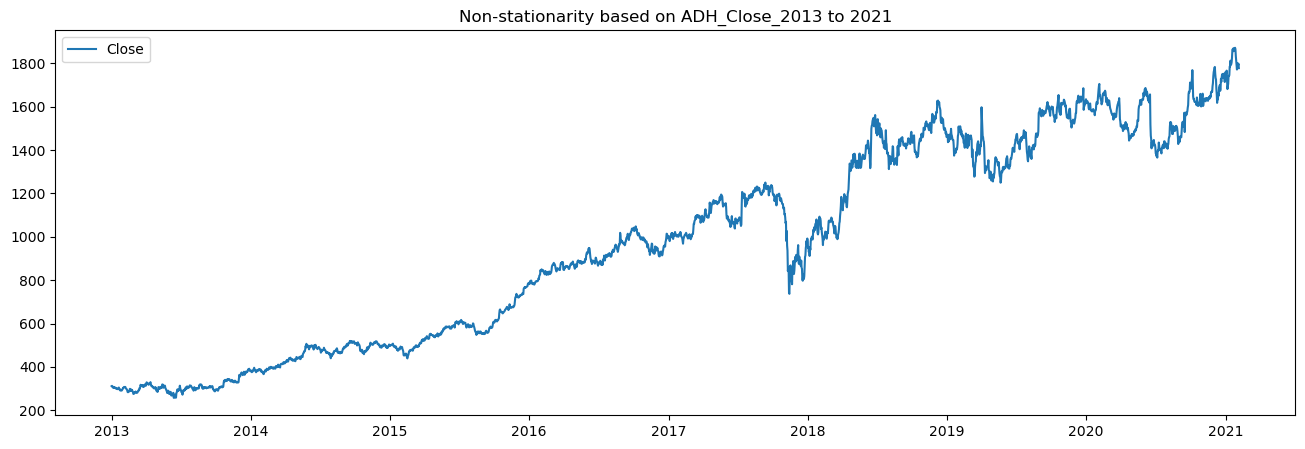

'Non-stationarity based on ADH'

In [108]:
adf_test(dataset["Close"],dataset,"Close")

the adfuller analysis has given us that the dataset is Non-stationary based on ADH

In [110]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


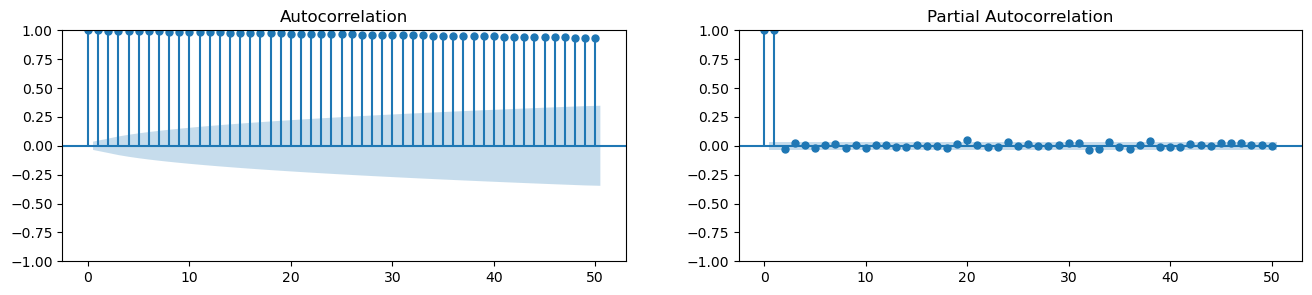

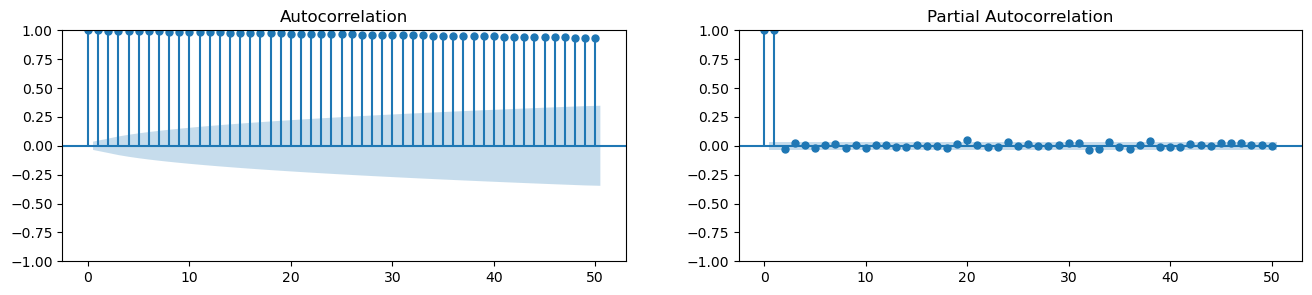

In [114]:
fig,axes = plt.subplots(1,2,figsize=(16,3),dpi=100)
plot_acf(dataset.Close.tolist(), lags=50, ax=axes[0])
plot_pacf(dataset.Close.tolist(), lags=50, ax=axes[1])

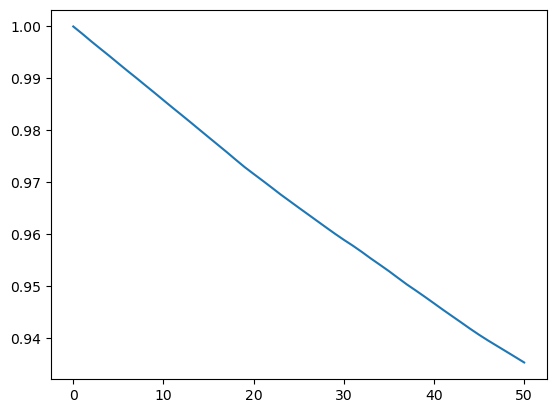

In [116]:
plt.plot(acf(dataset["Close"],nlags=50));

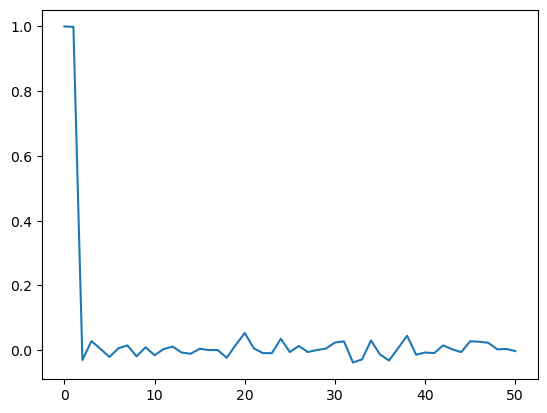

In [117]:
plt.plot(pacf(dataset["Close"], nlags=50))